# DSI2 Project 4 - Job Category Model Building

In [1]:
import pandas as pd
import numpy as np
import pickle

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Load pickle data.

pickle_in = open("jobs2.pickle","rb")
jobs2 = pickle.load(pickle_in)
print jobs2.shape
jobs2.head()

(550, 3)


,job_title,description,category
0,data analyst,the manager/senior manager uses data analytics...,0
1,data analyst,job descriptionsanalyse customer and campaign ...,0
2,data analyst,job summarywe are looking for data analyst who...,0
3,regional data analyst (reporting and automation),get to know the role:\nas our reporting and au...,0
4,junior data scientist,the data scientist will use information and mo...,2


# EDA

In [3]:
# Data analyst jobs.

print jobs2[jobs2['category'] == 0].shape
jobs2[jobs2['category'] == 0].head()

(187, 3)


,job_title,description,category
0,data analyst,the manager/senior manager uses data analytics...,0
1,data analyst,job descriptionsanalyse customer and campaign ...,0
2,data analyst,job summarywe are looking for data analyst who...,0
3,regional data analyst (reporting and automation),get to know the role:\nas our reporting and au...,0
5,junior data analyst (tableau),"our client, a us multinational corporation loc...",0


In [4]:
# Data engineer jobs.

print jobs2[jobs2['category'] == 1].shape
jobs2[jobs2['category'] == 1].head()

(147, 3)


,job_title,description,category
9,big data engineer,the big data engineer implements and maintains...,1
10,data engineer for analytics,"at apple, great ideas have a way of becoming g...",1
11,content engineer - data loss prevention,as a vice president in our cybersecurity organ...,1
12,"data center site engineer, singapore",about j.p. morgan chase & co.\njpmorgan chase ...,1
13,data engineer,"incorporated in 1984, main board-listed singap...",1


In [5]:
# Data scientist jobs.

print jobs2[jobs2['category'] == 2].shape
jobs2[jobs2['category'] == 2].head()

(135, 3)


,job_title,description,category
4,junior data scientist,the data scientist will use information and mo...,2
8,junior data scientist,summary of job scope:\nthe data scientist will...,2
21,research & development - data scientist - hair...,at p&g; we leverage advanced machine learning ...,2
58,data scientist,role & responsibilities: the successful candid...,2
68,associate / data scientist (asia),sprint milestone is a strategy and analytics c...,2


In [6]:
# Remove jobs that do not belong in any of these 3 categories.

print jobs2[jobs2['category'] == 'NA'].shape
print jobs2.shape
jobs2 = jobs2.drop(jobs2[jobs2['category'] == 'NA'].index)
print jobs2.shape

(81, 3)
(550, 3)
(469, 3)


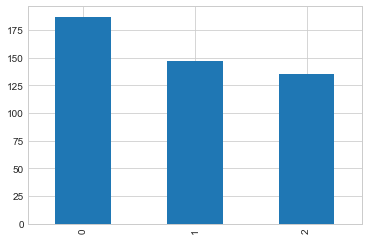

In [7]:
# Plot distribution of the 3 job categories.

jobs2['category'].value_counts().plot(kind='bar')

In [8]:
jobs2['category'].value_counts()/len(jobs2)

0    0.398721
1    0.313433
2    0.287846
Name: category, dtype: float64

# Prepare train/test datasets

In [9]:
# Select target y and predictor X. Perform CountVectorizer

y = jobs2['category']
X = jobs2['description']

from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english', ngram_range=(1, 1))

cvec.fit(X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
# Create new dataframe with vectorized words.

X_trans = pd.DataFrame(cvec.transform(X).todense(), columns=cvec.get_feature_names())
X_trans.head()

00  000  00am  00pm  00pm5  01  0157  01c4394  02  02c4944  03  03c4590  \
0   0    0     0     0      0   0     0        0   0        0   0        0   
1   2    2     0     0      0   0     0        0   0        0   0        0   
2   2    2     0     0      0   0     0        0   0        0   0        0   
3   0    0     0     0      0   0     0        0   0        0   0        0   
4   0    0     0     0      0   0     0        0   0        0   0        0   

   03c5451  04  05  05c4494  06  069543  06c2859job  06c3126  07  07c3147  \
0        0   0   0        0   0       0           0        0   0        0   
1        0   0   0        0   0       0           0        0   0        0   
2        0   0   0        0   0       0           0        0   0        0   
3        0   0   0        0   0       0           0        0   0        0   
4        0   0   0        0   0       0           0        0   0        0   

   07c3924  07c4117  07c4453  07c5639  07c5639job  07c5639monitor  08  \
0        0        0        0        0           0               0   0   
1        0        0        0        0           0               0   0   
2        0        0        0        0           0               1   0   
3        0        0        0        0           0               0   0   
4        0        0        0        0           0               0   0   

   08c2893  08c2893lim  08c2893won  09c3051  09c4169  09c5803  10  100  100gw  \
0        0           0           0        0        0        0   0    0      0   
1        0           0           0        0        0        0   0    0      0   
2        0           0           0        0        0        0   0    0      0   
3        0           0           0        0        0        0   0    0      0   
4        0           0           0        0        0        0   0    0      0   

   100m  104841  106861  108  10c5117  10gige  10gw  10m  11  11801  11c3837  \
0     0       0       0    0        0       0     0    0   0      0        0   
1     0       0       0    0        0       0     0    0   0      0        0   
2     0       0       0    0        0       0     0    0   0      0        0   
3     0       0       0    0        0       0     0    0   0      0        0   
4     0       0       0    0        0       0     0    0   0      0        0   

   11c4510  11c5502  12  120  12005  1219269  125  12848  12c6143job  13  130  \
0        0        0   0    0      0        0    0      0           0   0    0   
1        0        0   0    0      0        0    0      0           0   0    0   
2        0        0   0    0      0        0    0      0           0   0    0   
3        0        0   0    0      0        0    0      0           0   0    0   
4        0        0   0    0      0        0    0      0           0   0    0   

   13035  131417  131742  13c6321  13c6405  13c6507  13k  14  1407  1467  \
0      0       0       0        0        0        0    0   0     0     0   
1      0       0       0        0        0        0    0   0     0     0   
2      0       0       0        0        0        0    0   0     0     0   
3      0       0       0        0        0        0    0   0     0     0   
4      0       0       0        0        0        0    0   0     0     0   

   1470  15  150  1500  1504  1513  16  1653030  166  16s8060  16s8126  \
0     0   0    0     0     0     0   0        0    0        0        0   
1     0   0    0     0     0     0   0        0    0        0        0   
2     0   0    0     0     0     0   0        0    0        0        0   
3     0   0    0     0     0     0   0        0    0        0        0   
4     0   0    0     0     0     0   0        0    0        0        0   

   16s8216  16s8449job  17  170001mq  170001r4  170001z3  1700026j  17052066  \
0        0           0   0         0         0         0         0         0   
1        0           0   0         0         0         0         0         0   
2        0           0   0         

In [26]:
X_trans = X_trans.drop(['analyst', 'analystplease', 'analysts', 'analyststrong',
                        'engineer', 'engineering', 'engineers', 'engineersattracted', 'engineerthe',
                        'scientist', 'scientistexp', 'scientists'], axis=1)

In [27]:
# Prepare train/test sets.

from sklearn.model_selection import train_test_split

print y.shape
print X_trans.shape

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.7, random_state= 30)

print y_train.shape
print X_train.shape
print y_test.shape
print X_test.shape

(469,)
(469, 7823)
(140,)
(140, 7823)
(329,)
(329, 7823)


# Logistic Regression

In [28]:
# Change y dtype from object to int.

print y_train.dtype
print y_test.dtype
y_train = y_train.astype('int')
y_test = y_test.astype('int')

object
object


In [29]:
# Implement logistic regression.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

1.0
0.7750759878419453


In [30]:
# Function to create confusion matrix.

def print_cm(y_true, y_pred):
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print confusion

In [31]:
# View classification results.

y_pred = lr.predict(X_test)

print classification_report(y_test, y_pred)
print_cm(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.79      0.78      0.79       138
          1       0.75      0.74      0.75        97
          2       0.77      0.80      0.79        94

avg / total       0.78      0.78      0.78       329

Predicted    0   1   2  All
Actual                     
0          108  18  12  138
1           15  72  10   97
2           13   6  75   94
All        136  96  97  329


# Random Forest

In [32]:
# Implement Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(200, random_state=59)

rfc.fit(X_train, y_train)
print rfc.score(X_train, y_train)
print rfc.score(X_test, y_test)

1.0
0.7477203647416414


In [33]:
# View classification results.

y_pred2 = rfc.predict(X_test)

print classification_report(y_test, y_pred2)
print_cm(y_test, y_pred2)

             precision    recall  f1-score   support

          0       0.70      0.83      0.76       138
          1       0.77      0.63      0.69        97
          2       0.81      0.76      0.78        94

avg / total       0.75      0.75      0.75       329

Predicted    0   1   2  All
Actual                     
0          114  14  10  138
1           29  61   7   97
2           19   4  71   94
All        162  79  88  329


In [34]:
# View the words with the highest importance.

feature_importance = pd.DataFrame(rfc.feature_importances_, index = X_trans.columns,
                                  ).reset_index()
feature_importance.columns = ['features', 'importance']
print feature_importance.shape
feature_importance.sort_values('importance', ascending=False).head(20)

(7823, 2)


,features,importance
4066,learning,0.012339
5585,python,0.010327
6716,statistical,0.009225
6720,statistics,0.008773
1914,data,0.008445
3622,infrastructure,0.008120
6237,science,0.007779
2729,experience,0.007529
4235,machine,0.007424
4355,mathematics,0.006817
